In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as ex

# porterstemmer
# textblob
# text word

In [80]:
data = pd.read_csv(r'D:\Users\91917\Downloads\FashionDataset.csv')

In [81]:
data = data.drop(columns = ['Unnamed: 0'])

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30758 entries, 0 to 30757
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   BrandName  30758 non-null  object
 1   Deatils    30758 non-null  object
 2   Sizes      30758 non-null  object
 3   MRP        30758 non-null  object
 4   SellPrice  30758 non-null  object
 5   Discount   30758 non-null  object
 6   Category   30758 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [83]:
data['MRP'] = data.MRP.str.extract(r'(\d+)').astype('float')

In [86]:
# making another columns for discount range for better visualization of data

def vec(d):
    if 0 <d<=10:
        return '0-10'
    elif 10 <d <=20:
        return '10-20'
    elif 20 <d <=30:
        return '20-30'
    elif 30 <d <=40:
        return '30-40'
    elif 40 <d <=50:
        return '40-50'
    elif 50 <d <=60:
        return '50-60'
    elif 60 <d <=70:
        return '60-70'
    elif 70 <d <=80:
        return '70-80'
    elif 80 <d <=90:
        return '80-90'
    else: return 'No discount'
    
data['disc'] = data['Discount'].str.extract('(\d+)').astype('float')

data['discs'] = vecs(data.disc)
vecs = np.vectorize(vec)

In [87]:
data['SellPrice'] = data['SellPrice'].astype('float64')

In [90]:
data = data.drop(columns=['Discount'])

<AxesSubplot:>

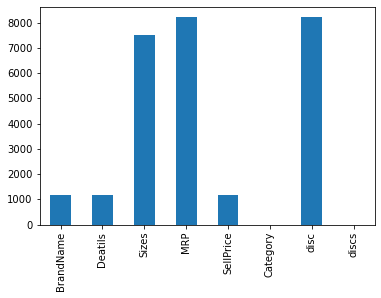

In [381]:
# null values present in each column 
data.isna().sum().plot(kind = 'bar')

In [118]:
data = data.replace('Nan', np.nan) 

In [119]:

dat = data.copy()

In [120]:
#dropped all null values 
co = dat.dropna()

In [121]:
co.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18374 entries, 0 to 28418
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BrandName  18374 non-null  object 
 1   Deatils    18374 non-null  object 
 2   Sizes      18374 non-null  object 
 3   MRP        18374 non-null  float64
 4   SellPrice  18374 non-null  float64
 5   Category   18374 non-null  object 
 6   disc       18374 non-null  float64
 7   discs      18374 non-null  object 
dtypes: float64(3), object(5)
memory usage: 1.3+ MB


In [124]:
data.describe().style.background_gradient(cmap = 'hot')

In [123]:
data.astype('object').describe()

BrandName                                            Deatils  \
count        29575                                              29575   
unique         274                                              23876   
top     vastranand  kanchipuram weave zari border and rich zari pa...   
freq          1543                                                 42   

                                          Sizes      MRP  SellPrice  \
count                                     23257  22550.0    29575.0   
unique                                     1171   1096.0     2045.0   
top     Size:Large,Medium,Small,X-Large,X-Small   1499.0      499.0   
freq                                       1972    925.0      804.0   

                 Category     disc  discs  
count               30758  22550.0  30758  
unique                  7     65.0     10  
top     Westernwear-Women     50.0  40-50  
freq                10374   7605.0   8223

<AxesSubplot:>

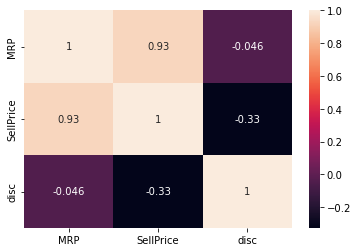

In [240]:
# sell price and MRP has highly propotional as expected 
sns.heatmap(data.corr(), annot= True)

In [138]:
# Animated scatter plot of selling price and MRP for all the brands for differnt type of categories ( highly informative)
ex.scatter(x= co.SellPrice, y =co.MRP, color = co.Category, animation_frame= co.BrandName, )

<AxesSubplot:xlabel='MRP', ylabel='SellPrice'>

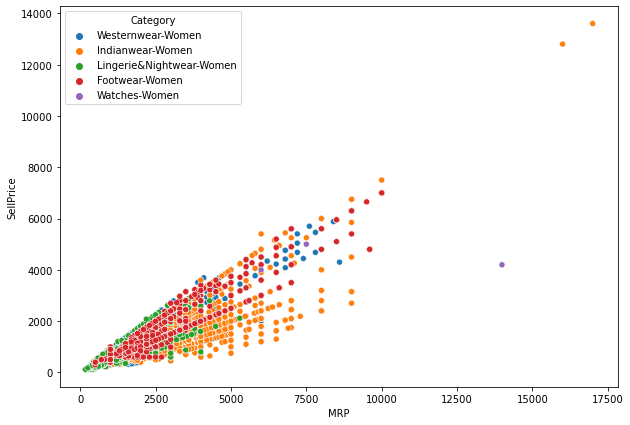

In [143]:
# scatter plot for MRP and selling price for differnt type of categores
plt.figure(figsize =(10,7))
sns.scatterplot(x= co.MRP, y = co.SellPrice , hue= co.Category)

In [163]:
brand = co.BrandName.value_counts(ascending = False)[:70]

In [213]:
# animated box plot on MRPs of different brand and their category ( highly informatice)
ex.box(data_frame=co,x= 'Category', y ='MRP' , color='Category', animation_frame='BrandName')

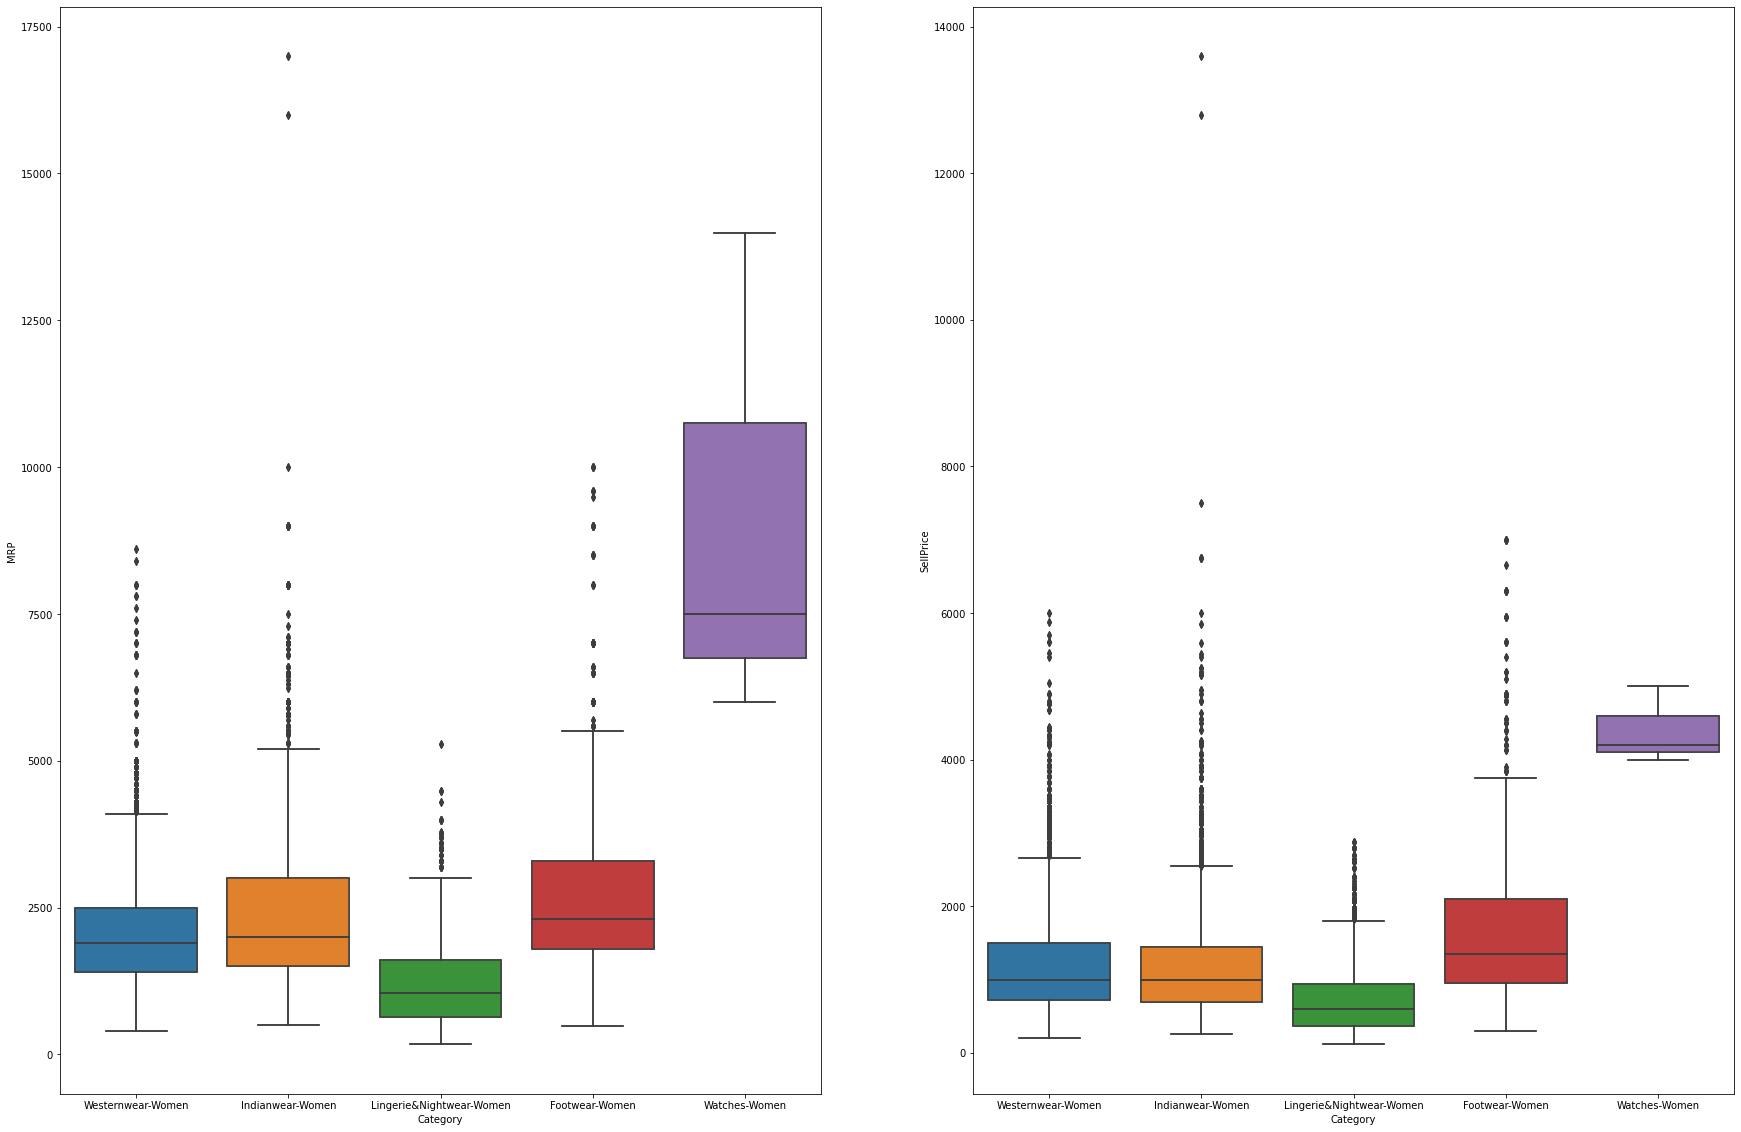

In [327]:
# side wise comparision of MRP and Selling price for differnt category 
fig, axs = plt.subplots(1,2, figsize = (30,20))
fil = co.filter(regex= 'P').columns
for e, axes in zip(fil, axs.flat):
    sns.boxplot(x = co.Category, y = co[e], ax = axes)
    sns.boxplot(x = co.Category, y = co[e], ax = axes)

In [329]:
# most expensive 40 items and their MRP and selling price 
co.sort_values(by='SellPrice', ascending = False).head(20).style.background_gradient('coolwarm')

<AxesSubplot:ylabel='BrandName'>

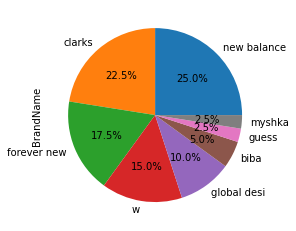

In [330]:
# top 8 brand with most expensive items [ Dark is most expensive in terms of selling]
expens = co.sort_values(by='SellPrice', ascending = False).head(40)
expens.BrandName.value_counts().plot(kind ='pie', autopct='%1.1f%%')

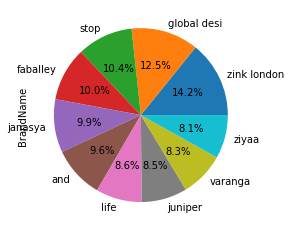

In [224]:
# brand with appeared most in data
brand = co.BrandName.value_counts()[:10].plot(kind ='pie', autopct='%1.1f%%')

<AxesSubplot:xlabel='Category'>

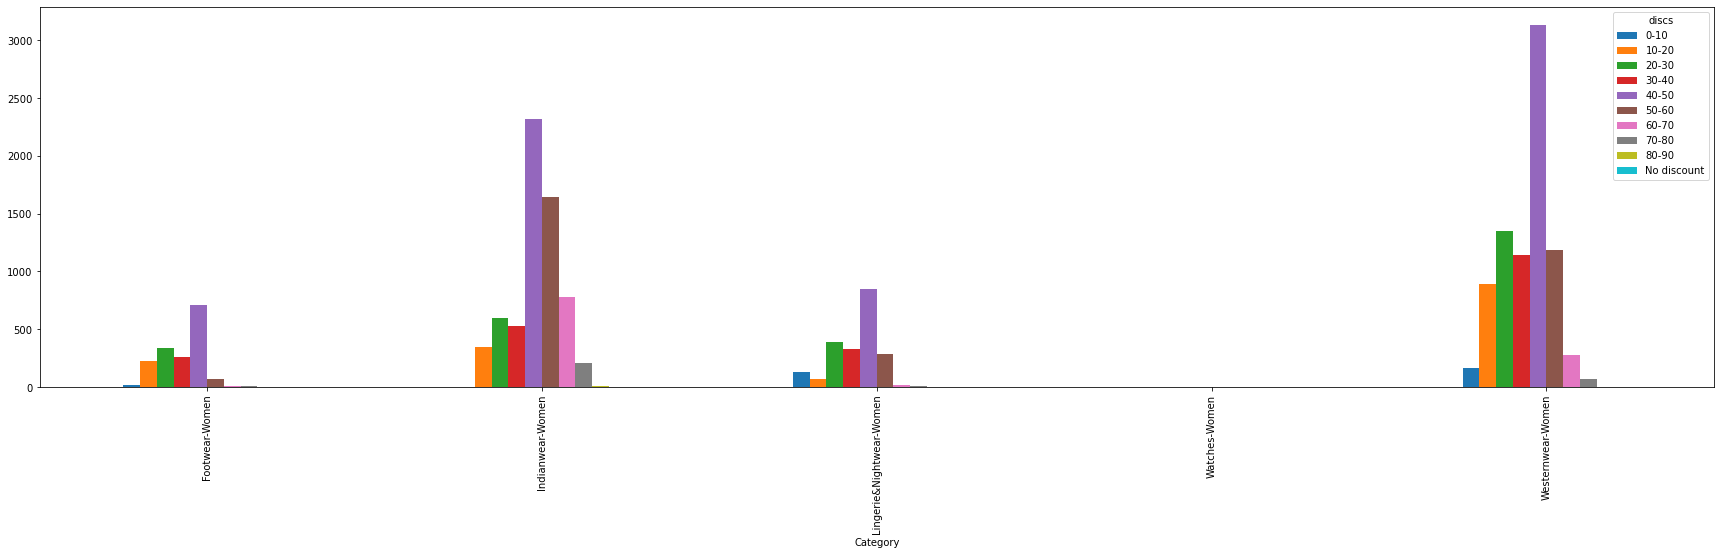

In [308]:
# bar plot describing the range of  discount given to differnt category 40-50 % discount given on all the type of categoty 
# but indianwear also gotten 50-60 and ~85% discount maximum time 
pd.crosstab(co.Category, co.discs).plot(kind ='bar', figsize =(30,7))

In [256]:
new_da = co.sort_values(by='disc' ,ascending= False)[:300]

array([<AxesSubplot:ylabel='71.0'>, <AxesSubplot:ylabel='72.0'>,
       <AxesSubplot:ylabel='73.0'>, <AxesSubplot:ylabel='74.0'>,
       <AxesSubplot:ylabel='75.0'>, <AxesSubplot:ylabel='76.0'>,
       <AxesSubplot:ylabel='77.0'>, <AxesSubplot:ylabel='78.0'>,
       <AxesSubplot:ylabel='79.0'>, <AxesSubplot:ylabel='80.0'>,
       <AxesSubplot:ylabel='85.0'>], dtype=object)

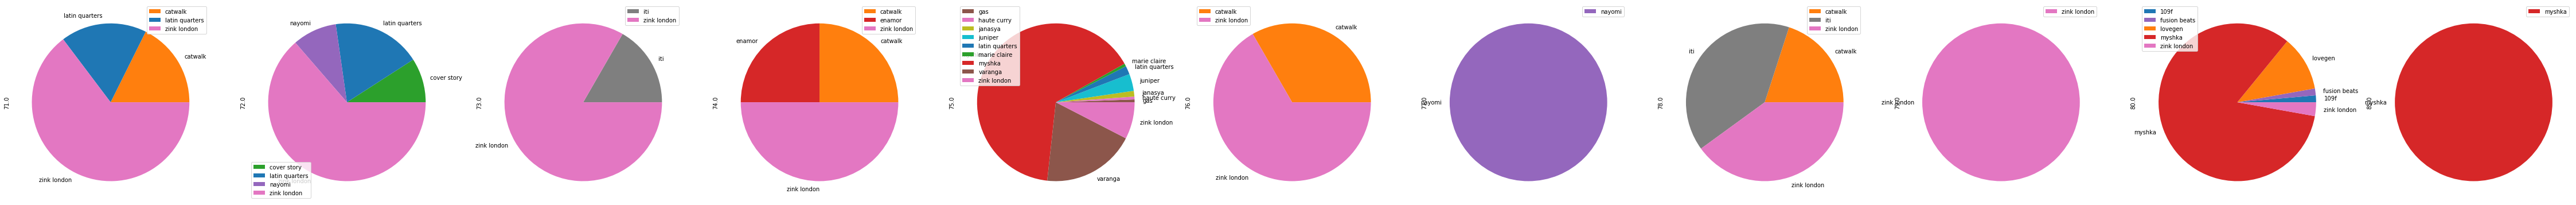

In [286]:
# brands which give discount over 70%-80 present on pie plot 
# here 70-76% discount mostly given by zinc landon, 77%-nayomi, and 80-85% by myshka
pd.crosstab(new_da['BrandName'], new_da['disc']).plot(kind = 'pie', figsize = (80,40), subplots=True)

<AxesSubplot:xlabel='BrandName'>

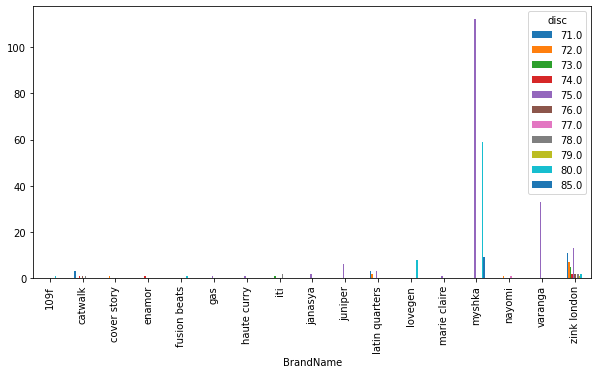

In [265]:
# bar plot explaining the same thing as above the pie chart 
pd.crosstab(new_da['BrandName'], new_da['disc']).plot(kind = 'bar', figsize = (10,5), subplots=False)

array([<AxesSubplot:title={'center':'Footwear-Women'}, xlabel='BrandName'>,
       <AxesSubplot:title={'center':'Indianwear-Women'}, xlabel='BrandName'>,
       <AxesSubplot:title={'center':'Lingerie&Nightwear-Women'}, xlabel='BrandName'>,
       <AxesSubplot:title={'center':'Westernwear-Women'}, xlabel='BrandName'>],
      dtype=object)

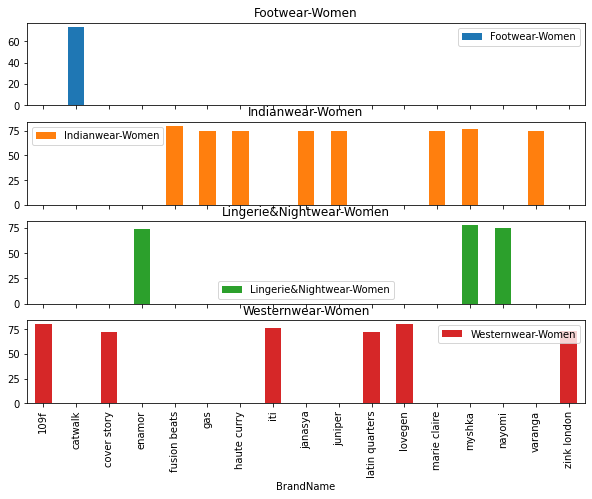

In [283]:
# mean % of discount given by componies on diffent category
# myshka gave mean 75% discount on both indianwear and lingerie_Nightwear  
# foot were got least amount of discount from these 4 category
new_da.pivot_table(values='disc', index = 'BrandName', columns='Category', aggfunc=np.mean).plot(kind ='bar', subplots=True, figsize = (10,7))

In [332]:
co.groupby('Category')['BrandName'].count()

Category
Footwear-Women              1638
Indianwear-Women            6428
Lingerie&Nightwear-Women    2084
Watches-Women                  3
Westernwear-Women           8221
Name: BrandName, dtype: int64

In [337]:
# animated bar plot giving diffent range of discount on differnt categoty (highly informative)

ex.bar(data_frame=co,  x='Category', animation_frame= 'BrandName', color='Category')

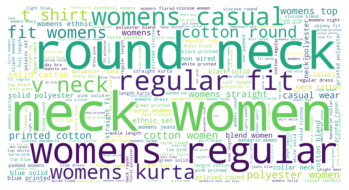

In [372]:
from wordcloud import WordCloud
new = " ".join(co.Deatils)
word_cloud1 = WordCloud(collocations = True, background_color = 'white',
                        width = 2048, height = 1080).generate(new)

plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()


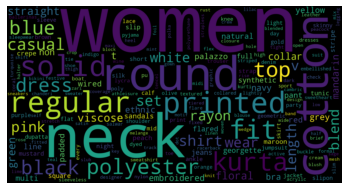

In [376]:
from wordcloud import WordCloud
new = " ".join(co.Deatils)
word_cloud1 = WordCloud(collocations = False,
                        width = 2048, height = 1080).generate(new)

plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()


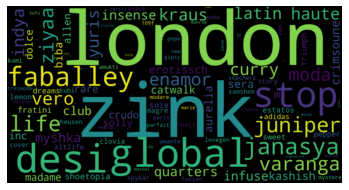

In [377]:
from wordcloud import WordCloud
new = " ".join(co.BrandName)
word_cloud1 = WordCloud(collocations = False,
                        width = 2048, height = 1080).generate(new)

plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()


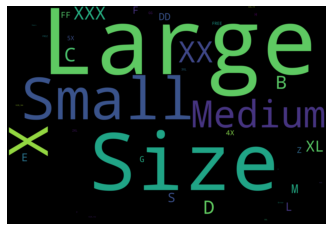

In [380]:
from wordcloud import WordCloud
new = " ".join(co.Sizes)
word_cloud1 = WordCloud(collocations = False,
                        width = 3048, height = 2080).generate(new)

plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

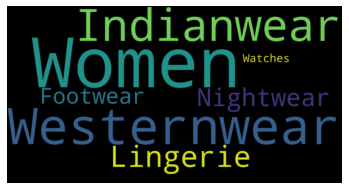

In [379]:
from wordcloud import WordCloud
new = " ".join(co.Category)
word_cloud1 = WordCloud(collocations = False,
                        width = 2048, height = 1080).generate(new)

plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()